In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import model_selection, metrics   
from sklearn.model_selection import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
import warnings
import shap
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)


C:\Users\58297\.conda\envs\py_cv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
train_data=pd.read_excel('trainset_t1c.xlsx', engine='openpyxl')
test_data =pd.read_excel('testset_t1c.xlsx', engine='openpyxl')
train_data = train_data.iloc[:,2:]
test_data = test_data.iloc[:,2:]
## 输出数据的大小信息
print('train shape:',train_data.shape)
print('test shape:',test_data.shape)

train shape: (98, 226)
test shape: (48, 226)


In [3]:
train_x = train_data.drop(["pathology"], axis=1)
train_y = train_data["pathology"]
test_x = test_data.drop(["pathology"], axis=1)
test_y = test_data["pathology"]
dtrain=xgb.DMatrix(train_x,label=train_y)
dtest=xgb.DMatrix(test_x,label=test_y)

In [4]:
cv_params = {'n_estimators': [1,2,3,4,5,6]}
other_params = {'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(train_x, train_y)
evalute_result = optimized_GBM.cv_results_
#print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[20:18:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
参数的最佳取值：{'n_estimators': 4}
最佳模型得分:0.8252631578947369


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [5]:
cv_params = {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_child_weight': [1, 2, 3, 4, 5, 6]}
other_params = {'learning_rate': 0.1, 'n_estimators': 4, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(train_x, train_y)
evalute_result = optimized_GBM.cv_results_
#print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[20:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
参数的最佳取值：{'max_depth': 3, 'min_child_weight': 1}
最佳模型得分:0.8252631578947369


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [6]:
cv_params = {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
other_params = {'learning_rate': 0.1, 'n_estimators': 4, 'max_depth': 3, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(train_x, train_y)
evalute_result = optimized_GBM.cv_results_
#print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[20:18:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
参数的最佳取值：{'gamma': 0.1}
最佳模型得分:0.8252631578947369


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [7]:
cv_params = {'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}
other_params = {'learning_rate': 0.1, 'n_estimators':4, 'max_depth': 3, 'min_child_weight':1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.1, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(train_x, train_y)
evalute_result = optimized_GBM.cv_results_
#print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[20:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
参数的最佳取值：{'colsample_bytree': 0.8, 'subsample': 0.8}
最佳模型得分:0.8252631578947369


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [8]:
cv_params = {'reg_alpha': [0.05, 0.1, 1, 2, 3], 'reg_lambda': [0.05, 0.1, 1, 2, 3]}
other_params = {'learning_rate': 0.1, 'n_estimators': 4, 'max_depth': 3, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.1, 'reg_alpha': 0, 'reg_lambda': 1}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(train_x, train_y)
evalute_result = optimized_GBM.cv_results_
#print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[20:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
参数的最佳取值：{'reg_alpha': 0.1, 'reg_lambda': 0.1}
最佳模型得分:0.8257894736842106


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [9]:
cv_params = {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]}
other_params = {'learning_rate': 0.1, 'n_estimators': 4, 'max_depth': 3, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0.1, 'reg_alpha': 0.1, 'reg_lambda': 0.1}
model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, scoring='accuracy', cv=5, verbose=1, n_jobs=4)
optimized_GBM.fit(train_x, train_y)
evalute_result = optimized_GBM.cv_results_
#print('每轮迭代运行结果:{0}'.format(evalute_result))
print('参数的最佳取值：{0}'.format(optimized_GBM.best_params_))
print('最佳模型得分:{0}'.format(optimized_GBM.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[20:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
参数的最佳取值：{'learning_rate': 0.01}
最佳模型得分:0.8363157894736842


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


In [10]:

params={
        'booster':'gbtree',
        'objective': 'multi:softmax', #指明是分类问题
       # 'eval_metric': 'auc',
        'num_class':2, # 类数，与 multisoftmax 并用
        'gamma':0.1,  # 用于控制是否后剪枝的参数,越大越保守，一般0.1、0.2这样子。
        'max_depth':3, # 构建树的深度，越大越容易过拟合
        'lambda':0.05,  #控制模型复杂度的权重值的L2正则化项参数，参数越大，模型越不容易过拟合。
        'subsample':0.8, # 采样训练数据，设置为0.5，随机选择一般的数据实例 (0:1]
        'colsample_bytree':0.8, # 构建树树时的采样比率 (0:1]
        'min_child_weight':1, # 节点的最少特征数
        'silent':1 ,# 设置成1则没有运行信息输出，最好是设置为0.
        'eta': 0.1, # 如同学习率
        'seed':710,
        'alpha':0.05,
        'nthread':8,# cpu 线程数,根据自己U的个数适当调整
}
plst = list(params.items())
num_rounds=1000
watchlist = [(dtrain,'train'),(dtest,'eval')]
model=xgb.train(plst,dtrain,num_rounds,evals=watchlist)

[20:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:18:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	train-mlogloss:0.61984	eval-mlogloss:0.64789
[1]	train-mlogloss:0.56298	eval-mlogloss:0.61358
[2]	train-mlogloss:0.51979	eval-mlogloss:0.59928
[3]	train-mlogloss:0.48109	eval-mlogloss:0.58707
[4]	train-mlogloss:0.44117	eval-mlogloss:0.57429
[5]	train-mlogloss:0.40514	eva

[149]	train-mlogloss:0.02048	eval-mlogloss:0.51980
[150]	train-mlogloss:0.02049	eval-mlogloss:0.52030
[151]	train-mlogloss:0.02029	eval-mlogloss:0.52105
[152]	train-mlogloss:0.02029	eval-mlogloss:0.52090
[153]	train-mlogloss:0.02028	eval-mlogloss:0.51907
[154]	train-mlogloss:0.02028	eval-mlogloss:0.51893
[155]	train-mlogloss:0.02028	eval-mlogloss:0.51943
[156]	train-mlogloss:0.02028	eval-mlogloss:0.51921
[157]	train-mlogloss:0.02028	eval-mlogloss:0.51912
[158]	train-mlogloss:0.02028	eval-mlogloss:0.51893
[159]	train-mlogloss:0.02028	eval-mlogloss:0.51850
[160]	train-mlogloss:0.02028	eval-mlogloss:0.51869
[161]	train-mlogloss:0.02028	eval-mlogloss:0.51869
[162]	train-mlogloss:0.02028	eval-mlogloss:0.51909
[163]	train-mlogloss:0.02028	eval-mlogloss:0.51945
[164]	train-mlogloss:0.02028	eval-mlogloss:0.51890
[165]	train-mlogloss:0.02028	eval-mlogloss:0.51896
[166]	train-mlogloss:0.02028	eval-mlogloss:0.51872
[167]	train-mlogloss:0.02028	eval-mlogloss:0.51872
[168]	train-mlogloss:0.02028	ev

[310]	train-mlogloss:0.01917	eval-mlogloss:0.51845
[311]	train-mlogloss:0.01917	eval-mlogloss:0.51770
[312]	train-mlogloss:0.01917	eval-mlogloss:0.51726
[313]	train-mlogloss:0.01917	eval-mlogloss:0.51719
[314]	train-mlogloss:0.01917	eval-mlogloss:0.51725
[315]	train-mlogloss:0.01917	eval-mlogloss:0.51697
[316]	train-mlogloss:0.01917	eval-mlogloss:0.51697
[317]	train-mlogloss:0.01907	eval-mlogloss:0.51866
[318]	train-mlogloss:0.01907	eval-mlogloss:0.51869
[319]	train-mlogloss:0.01907	eval-mlogloss:0.51838
[320]	train-mlogloss:0.01907	eval-mlogloss:0.51850
[321]	train-mlogloss:0.01907	eval-mlogloss:0.51850
[322]	train-mlogloss:0.01907	eval-mlogloss:0.51824
[323]	train-mlogloss:0.01907	eval-mlogloss:0.51829
[324]	train-mlogloss:0.01907	eval-mlogloss:0.51790
[325]	train-mlogloss:0.01907	eval-mlogloss:0.51790
[326]	train-mlogloss:0.01907	eval-mlogloss:0.51789
[327]	train-mlogloss:0.01907	eval-mlogloss:0.51862
[328]	train-mlogloss:0.01907	eval-mlogloss:0.51862
[329]	train-mlogloss:0.01907	ev

[471]	train-mlogloss:0.01841	eval-mlogloss:0.52332
[472]	train-mlogloss:0.01841	eval-mlogloss:0.52302
[473]	train-mlogloss:0.01841	eval-mlogloss:0.52302
[474]	train-mlogloss:0.01841	eval-mlogloss:0.52247
[475]	train-mlogloss:0.01840	eval-mlogloss:0.52184
[476]	train-mlogloss:0.01840	eval-mlogloss:0.52207
[477]	train-mlogloss:0.01840	eval-mlogloss:0.52177
[478]	train-mlogloss:0.01840	eval-mlogloss:0.52165
[479]	train-mlogloss:0.01840	eval-mlogloss:0.52101
[480]	train-mlogloss:0.01840	eval-mlogloss:0.52101
[481]	train-mlogloss:0.01840	eval-mlogloss:0.52045
[482]	train-mlogloss:0.01840	eval-mlogloss:0.52099
[483]	train-mlogloss:0.01840	eval-mlogloss:0.52099
[484]	train-mlogloss:0.01835	eval-mlogloss:0.52060
[485]	train-mlogloss:0.01829	eval-mlogloss:0.52314
[486]	train-mlogloss:0.01829	eval-mlogloss:0.52314
[487]	train-mlogloss:0.01829	eval-mlogloss:0.52314
[488]	train-mlogloss:0.01830	eval-mlogloss:0.52349
[489]	train-mlogloss:0.01829	eval-mlogloss:0.52313
[490]	train-mlogloss:0.01829	ev

[632]	train-mlogloss:0.01806	eval-mlogloss:0.52446
[633]	train-mlogloss:0.01806	eval-mlogloss:0.52424
[634]	train-mlogloss:0.01806	eval-mlogloss:0.52384
[635]	train-mlogloss:0.01806	eval-mlogloss:0.52375
[636]	train-mlogloss:0.01806	eval-mlogloss:0.52328
[637]	train-mlogloss:0.01806	eval-mlogloss:0.52244
[638]	train-mlogloss:0.01806	eval-mlogloss:0.52301
[639]	train-mlogloss:0.01806	eval-mlogloss:0.52262
[640]	train-mlogloss:0.01806	eval-mlogloss:0.52262
[641]	train-mlogloss:0.01806	eval-mlogloss:0.52280
[642]	train-mlogloss:0.01806	eval-mlogloss:0.52280
[643]	train-mlogloss:0.01806	eval-mlogloss:0.52280
[644]	train-mlogloss:0.01806	eval-mlogloss:0.52232
[645]	train-mlogloss:0.01806	eval-mlogloss:0.52251
[646]	train-mlogloss:0.01806	eval-mlogloss:0.52279
[647]	train-mlogloss:0.01806	eval-mlogloss:0.52279
[648]	train-mlogloss:0.01806	eval-mlogloss:0.52242
[649]	train-mlogloss:0.01806	eval-mlogloss:0.52226
[650]	train-mlogloss:0.01807	eval-mlogloss:0.52167
[651]	train-mlogloss:0.01806	ev

[793]	train-mlogloss:0.01788	eval-mlogloss:0.52426
[794]	train-mlogloss:0.01788	eval-mlogloss:0.52414
[795]	train-mlogloss:0.01788	eval-mlogloss:0.52368
[796]	train-mlogloss:0.01788	eval-mlogloss:0.52376
[797]	train-mlogloss:0.01788	eval-mlogloss:0.52353
[798]	train-mlogloss:0.01788	eval-mlogloss:0.52353
[799]	train-mlogloss:0.01788	eval-mlogloss:0.52353
[800]	train-mlogloss:0.01788	eval-mlogloss:0.52361
[801]	train-mlogloss:0.01788	eval-mlogloss:0.52352
[802]	train-mlogloss:0.01788	eval-mlogloss:0.52352
[803]	train-mlogloss:0.01788	eval-mlogloss:0.52416
[804]	train-mlogloss:0.01788	eval-mlogloss:0.52413
[805]	train-mlogloss:0.01788	eval-mlogloss:0.52482
[806]	train-mlogloss:0.01788	eval-mlogloss:0.52467
[807]	train-mlogloss:0.01789	eval-mlogloss:0.52587
[808]	train-mlogloss:0.01788	eval-mlogloss:0.52578
[809]	train-mlogloss:0.01788	eval-mlogloss:0.52532
[810]	train-mlogloss:0.01788	eval-mlogloss:0.52513
[811]	train-mlogloss:0.01788	eval-mlogloss:0.52460
[812]	train-mlogloss:0.01788	ev

[954]	train-mlogloss:0.01773	eval-mlogloss:0.52353
[955]	train-mlogloss:0.01773	eval-mlogloss:0.52327
[956]	train-mlogloss:0.01773	eval-mlogloss:0.52285
[957]	train-mlogloss:0.01773	eval-mlogloss:0.52353
[958]	train-mlogloss:0.01773	eval-mlogloss:0.52434
[959]	train-mlogloss:0.01773	eval-mlogloss:0.52397
[960]	train-mlogloss:0.01773	eval-mlogloss:0.52433
[961]	train-mlogloss:0.01773	eval-mlogloss:0.52475
[962]	train-mlogloss:0.01773	eval-mlogloss:0.52496
[963]	train-mlogloss:0.01773	eval-mlogloss:0.52463
[964]	train-mlogloss:0.01773	eval-mlogloss:0.52425
[965]	train-mlogloss:0.01773	eval-mlogloss:0.52444
[966]	train-mlogloss:0.01773	eval-mlogloss:0.52398
[967]	train-mlogloss:0.01773	eval-mlogloss:0.52407
[968]	train-mlogloss:0.01773	eval-mlogloss:0.52412
[969]	train-mlogloss:0.01773	eval-mlogloss:0.52464
[970]	train-mlogloss:0.01773	eval-mlogloss:0.52484
[971]	train-mlogloss:0.01774	eval-mlogloss:0.52508
[972]	train-mlogloss:0.01773	eval-mlogloss:0.52453
[973]	train-mlogloss:0.01773	ev

In [11]:
ypred=model.predict(dtest)
#计算准确率
cnt1=0
cnt2=0
for i in range(len(test_y)):
    if ypred[i]==test_y[i]:
        cnt1+=1
    else:
        cnt2+=1
print ('准确率:%.2f %%' % (100*cnt1/(cnt1+cnt2))) 
print(metrics.accuracy_score(test_y, ypred)) 

准确率:81.25 %
0.8125


In [12]:
xgb1 = XGBClassifier(
     learning_rate=0.1, 
     n_estimators=4, 
     max_depth=3,
     min_child_weight=1,
     seed=0,
     subsample=0.8, 
     colsample_bytree=0.8, 
     gamma=0.1, 
     reg_alpha=0.1, 
     reg_lambda=0.1)
xgb1.fit(train_x,train_y)
ypred1=xgb1.predict(test_x)
print(metrics.accuracy_score(test_y, ypred1))

[20:18:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8125


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


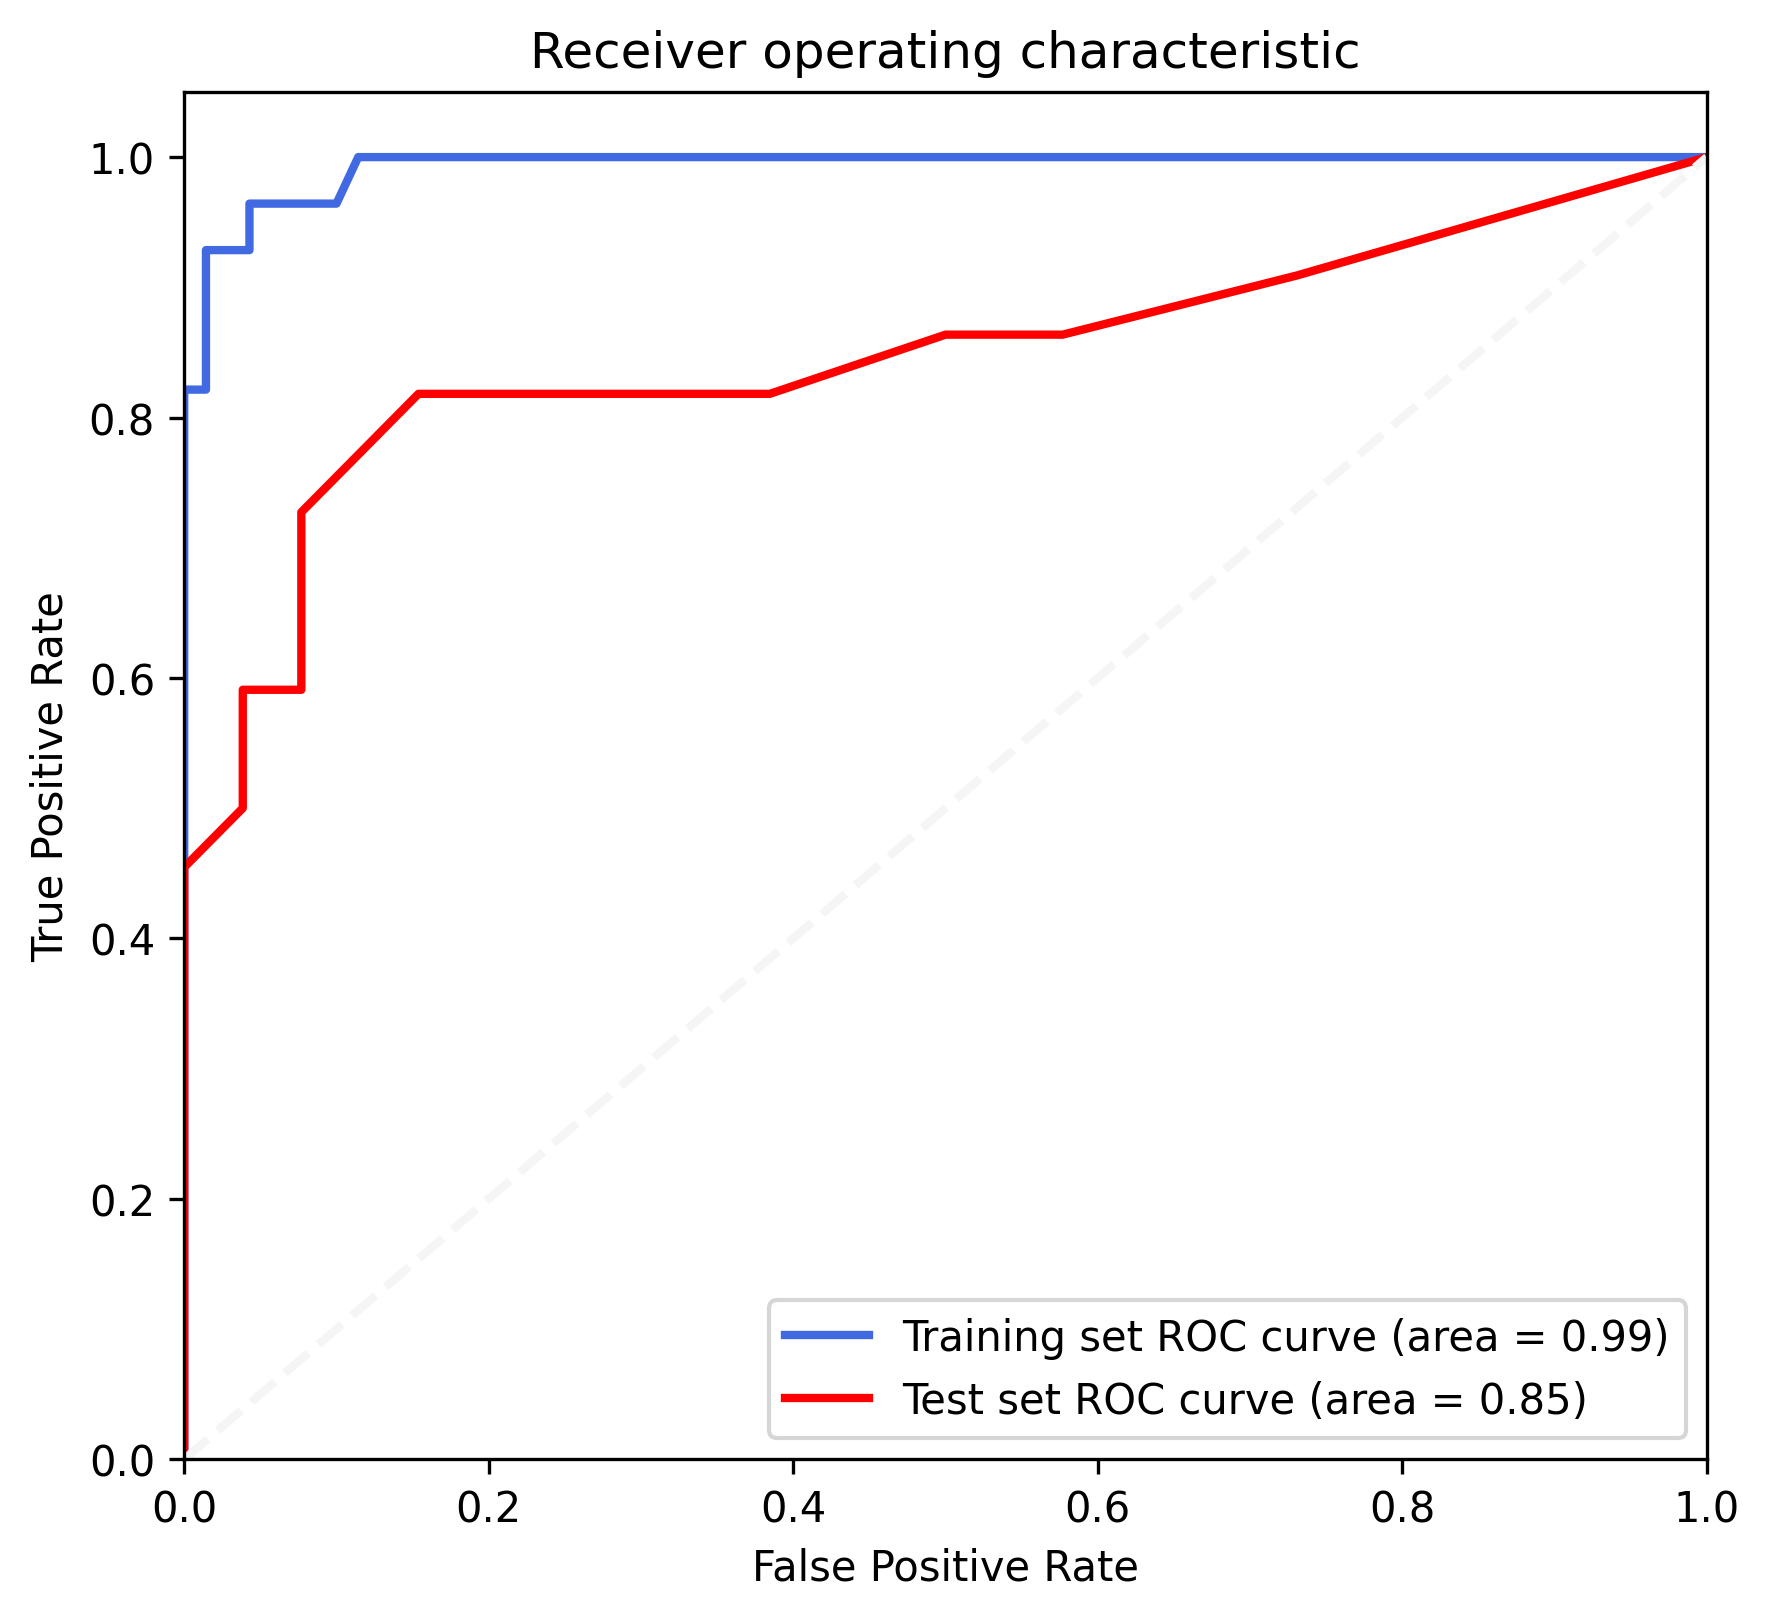

In [13]:
# 2 ROC
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import metrics
y_pred_proba = xgb1.predict_proba(test_x)
fpr, tpr, thresholds = metrics.roc_curve(test_y,y_pred_proba[:,1], pos_label=1)
y_train_predprob = xgb1.predict_proba(train_x)
fpr1, tpr1, thresholds1 = roc_curve(train_y, y_train_predprob[:,1], pos_label=1)
roc_auc = metrics.auc(fpr,tpr)
roc_auc1 = metrics.auc(fpr1,tpr1)
plt.figure(figsize=(6,5.5),dpi=300)
lw = 2
plt.plot(
    fpr1,
    tpr1,
    color="royalblue",
    lw=lw,
    label="Training set ROC curve (area = %0.2f)" % roc_auc1,
)
plt.plot(
    fpr,
    tpr,
    color="red",
    lw=lw,
    label="Test set ROC curve (area = %0.2f)" % roc_auc,
)

plt.plot([0, 1], [0, 1], color="whitesmoke", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
# plt.savefig('auc_roc.pdf')
plt.tight_layout()
plt.show()


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[20:18:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7739130434782608


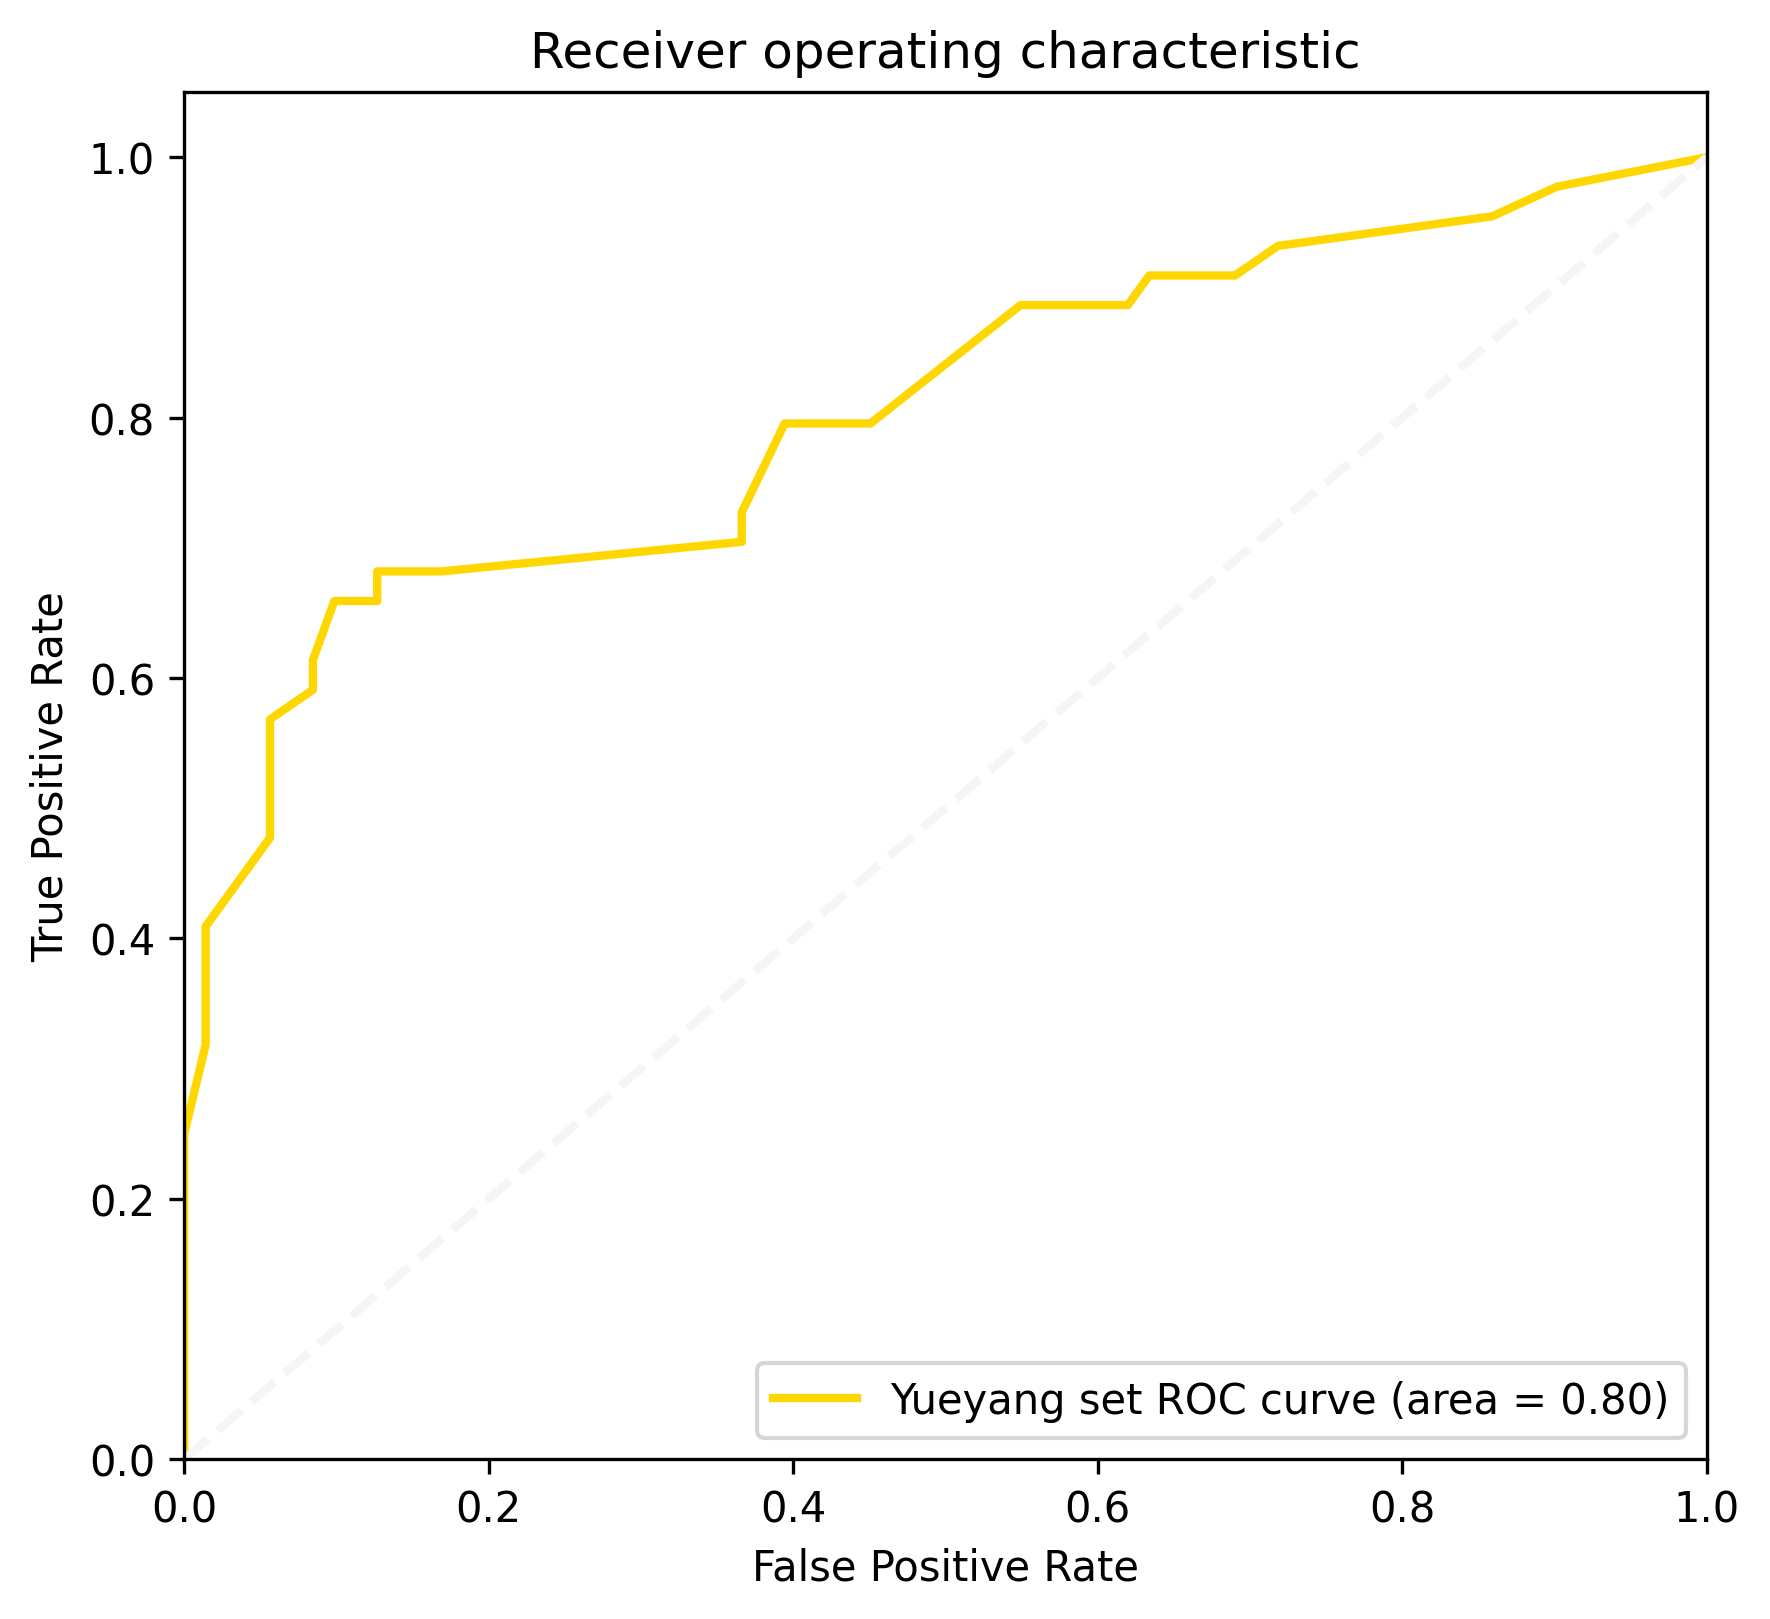

In [14]:
train_data_A=pd.read_excel('trainset_t1c.xlsx', engine='openpyxl')
train_data_B=pd.read_excel('testset_t1c.xlsx', engine='openpyxl')
train_data = train_data_A.append(train_data_B, ignore_index=True)
test_data =pd.read_excel('yueyang_t1c_N4_re.xlsx', engine='openpyxl')
train_data = train_data.iloc[:,2:]
test_data = test_data.iloc[:,2:]
train_x = train_data.drop(["pathology"], axis=1)
train_y = train_data["pathology"]
test_x = test_data.drop(["pathology"], axis=1)
test_y = test_data["pathology"]

xgb1.fit(train_x,train_y)
ypred1=xgb1.predict(test_x)
print(metrics.accuracy_score(test_y, ypred1))
#single ROC
y_pred_proba = xgb1.predict_proba(test_x)
fpr, tpr, thresholds = metrics.roc_curve(test_y,y_pred_proba[:,1], pos_label=1)
y_train_predprob = xgb1.predict_proba(train_x)
fpr1, tpr1, thresholds1 = roc_curve(train_y, y_train_predprob[:,1], pos_label=1)
roc_auc = metrics.auc(fpr,tpr)
roc_auc1 = metrics.auc(fpr1,tpr1)
plt.figure(figsize=(6,5.5),dpi=300)
lw = 2
plt.plot(
    fpr,
    tpr,
    color="gold",
    lw=lw,
    label="Yueyang set ROC curve (area = %0.2f)" % roc_auc,
)

plt.plot([0, 1], [0, 1], color="whitesmoke", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
# plt.savefig('auc_roc.pdf')
plt.tight_layout()
plt.show()

In [15]:
import itertools
def plot_confusion_matrix(cm,
                          classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    # This function prints and plots the confusion matrix
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
 
    # cneter 改为 center
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,
                 i,
                 cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

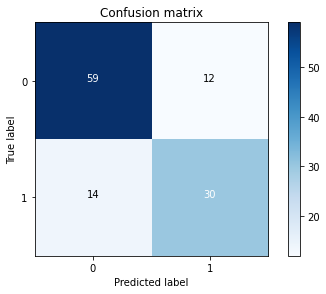

In [16]:
from sklearn.metrics import confusion_matrix
class_names = [0, 1]
cnf_matrix = confusion_matrix(test_y, ypred1)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix,
                      classes=class_names,
                      title='Confusion matrix')
plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


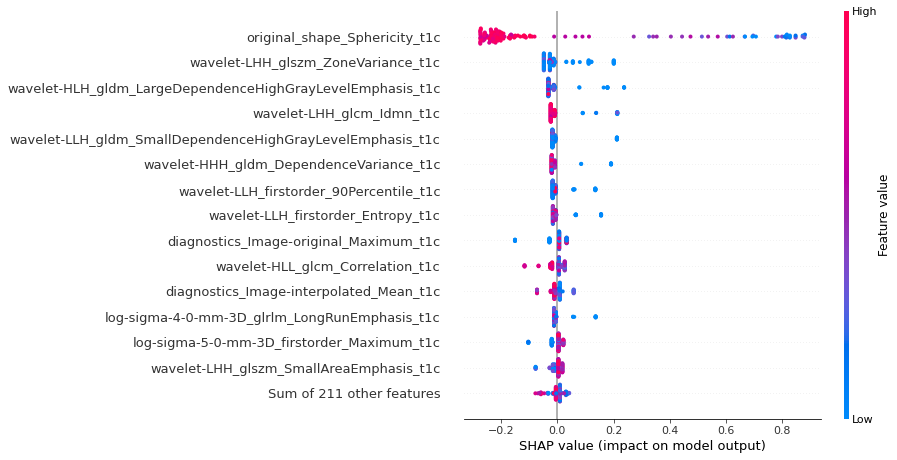

In [17]:
shap.initjs()
explainer = shap.TreeExplainer(xgb1)
shap_interaction  = explainer.shap_values(train_x)
shap_values = explainer(train_x)
# shap.summary_plot(shap_values, train_x, max_display = 15)
shap.plots.beeswarm(shap_values, max_display = 15)

In [18]:
idx = 5
data_for_prediction = train_x.iloc[idx]
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)


print(xgb1.predict_proba(data_for_prediction_array))

shap.initjs()
explainer = shap.TreeExplainer(xgb1)
shap_values = explainer.shap_values(data_for_prediction_array)
shap.force_plot(explainer.expected_value, shap_values, data_for_prediction)

[[0.62 0.38]]


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
